In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

from IPython.display import display
import math

from sklearn.feature_extraction.text import CountVectorizer
from pymystem3 import Mystem

In [2]:
df=pd.read_json("..\\data\\raw\\SamT4lUk.json", lines=True)
df

,title,text,tags,comment_texts,comment__authors,other,comment_dates,breadcrumps,ctime,curl
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Kia, Sorento, 2013, 2 поколение, рестайлинг, ...","[Добрый. Нет, это не катализатор, если проблем...","[autobazar86, Dr2001]","[18.06.2020, 19129157, 38]","[18.06.2020, 18.06.2020]","[Дром, Вопросы и Ответы, Kia, Sorento]",1592523125,https://www.drom.ru/faq/kia/sorento/Dobriy-pod...
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,"[Nissan, X-Trail, 2005, 1 поколение, рестайлин...",[Ручками и инструментом! Или обращаются в Серв...,[autobazar86],"[18.06.2020, , 38]",[18.06.2020],"[Дром, Вопросы и Ответы, Nissan, X-Trail]",1592523125,https://www.drom.ru/faq/nissan/x-trail/Kak-sny...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Volkswagen, Golf, 2007, 5 поколение, 1.6 л, Б...","[Здравствуйте. Ну, можно попробовать поставить...",[autobazar86],"[18.06.2020, , 14]",[18.06.2020],"[Дром, Вопросы и Ответы, Volkswagen, Golf]",1592523125,https://www.drom.ru/faq/volkswagen/golf/ZDRAVS...
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...","[Toyota, Crown, 2001, 11 поколение, рестайлинг...",NaN,NaN,"[17.06.2020, , 178]",NaN,"[Дром, Вопросы и Ответы, Toyota, Crown]",1592523125,https://www.drom.ru/faq/toyota/crown/Ne-rabota...
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...","[Toyota, Crown, 2000, 11 поколение, 2.5 л, Бен...",[Прочитал на одном форуме интересное правило: ...,[autobazar86],"[17.06.2020, 11925916, 31]",[18.06.2020],"[Дром, Вопросы и Ответы, Toyota, Crown]",1592523125,https://www.drom.ru/faq/toyota/crown/Nerabotae...
...,...,...,...,...,...,...,...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Toyota, ist, двигатель]","[Короб фильтра подтяни и забей. Это норм, Поду...","[fishtank, БалероэндКраковяка, fishtank, ASD-Z...","[01.02.2014, 86]","[01.02.2014, 01.02.2014, 01.02.2014, 01.02.201...","[Дром, Вопросы и Ответы, Toyota, ist]",1592581754,https://www.drom.ru/faq/toyota/ist/Otkuda-vibr...
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,"[Toyota, Avensis Verso, двигатель]",[И Вам здравствовать!\nСкорее всего не было ко...,"[CanMan, CanMan, igorrem]","[31.01.2014, 39]","[31.01.2014, 31.01.2014, 31.01.2014]","[Дром, Вопросы и Ответы, Toyota, Avensis Verso]",1592581754,https://www.drom.ru/faq/toyota/avensis_verso/O...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....","[Toyota, Ipsum, трансмиссия]",[И Вам доброго!\n1. Одному Богу известно.\n2. ...,"[CanMan, CanMan, remza.max, Mityanich]","[31.01.2014, 13]","[31.01.2014, 31.01.2014, 31.01.2014, 01.02.2014]","[Дром, Вопросы и Ответы, Toyota, Ipsum]",1592581756,https://www.drom.ru/faq/toyota/ipsum/Pochemu-A...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...","[Лада, 4x4 2121 Нива, общие вопросы]",[666_Ghost-Basters_666;1 151106709:говорят пер...,"[TOY_302, -vk-]","[31.01.2014, 313]","[02.02.2014, 06.04.2017]","[Дром, Вопросы и Ответы, Лада, 4x4 2121 Нива]",1592581757,https://www.drom.ru/faq/lada/2121_4x4_niva/Kak...


<h3>So, we want to get pairs problem-solution. Our problem could be in the "title" or in the "text" column (or both) and solution could be in the "comment_texts" column.

In [3]:
df_procesed=df.iloc[:,[0,1,3]]
df_procesed

,title,text,comment_texts
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Добрый. Нет, это не катализатор, если проблем..."
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,[Ручками и инструментом! Или обращаются в Серв...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Здравствуйте. Ну, можно попробовать поставить..."
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...",[Прочитал на одном форуме интересное правило: ...
...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Короб фильтра подтяни и забей. Это норм, Поду..."
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,[И Вам здравствовать!\nСкорее всего не было ко...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",[И Вам доброго!\n1. Одному Богу известно.\n2. ...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...",[666_Ghost-Basters_666;1 151106709:говорят пер...


<h3>We will merge all problems and all solutions to one string.

In [4]:
#isnan for nullable strings and lists
def isnan(value):
    try:
        return math.isnan(float(value))
    except:
        return False


def merge_title_text(x):
    title=x.title
    text=x.text

    if(title==text and title==""):
        return np.NaN
    if(isnan(title)):
        return text
    if(isnan(text)):
        return title


    if(title==text):
        return text
    
    return text+" "+title

def merge_comment_texts(x):
    ct=x.comment_texts
    if(isnan(ct)):
        return np.NaN

    if(len(ct)==0):
        return np.NaN
    
    res=""
    for i in range(len(ct)):
        res+=ct[i]+" "

    return res

df_procesed["problem"]=df_procesed.apply(merge_title_text,axis=1)
df_procesed["solution"]=df_procesed.apply(merge_comment_texts,axis=1)
df_procesed

C:\Users\Oleg\AppData\Local\Temp/ipykernel_19936/1637273236.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesed["problem"]=df_procesed.apply(merge_title_text,axis=1)
C:\Users\Oleg\AppData\Local\Temp/ipykernel_19936/1637273236.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesed["solution"]=df_procesed.apply(merge_comment_texts,axis=1)


,title,text,comment_texts,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый.... подскажите пожалуйста, в чем причин...","[Добрый. Нет, это не катализатор, если проблем...","Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Как снять впускной колектор на икстрейле двс Q...,[Ручками и инструментом! Или обращаются в Серв...,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"[Здравствуйте. Ну, можно попробовать поставить...",ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Не работает сенсор на управление кондицианера,...","Не работает сенсор на управление кондицианера,...",NaN,"Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Неработает сенсор монитора управления печкой, ...",[Прочитал на одном форуме интересное правило: ...,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
...,...,...,...,...,...
49971,Откуда вибрация впуска 2NZ-FE?,Приветствую!\n\nОн так и должен работать или э...,"[Короб фильтра подтяни и забей. Это норм, Поду...",Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
49972,Отчего моргает лампочка двигателя на Авенсис В...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,[И Вам здравствовать!\nСкорее всего не было ко...,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
49973,"Почему АКПП то пинается, то нет на старом блок...","Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",[И Вам доброго!\n1. Одному Богу известно.\n2. ...,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
49974,Какие чаще всего проблемы беспокоят у Нивы 2121?,"Так то в машинах разбираюсь, но хочу спросить ...",[666_Ghost-Basters_666;1 151106709:говорят пер...,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


In [5]:
#drop unecessary columns
df_procesed=df_procesed.iloc[:,3:5]
df_procesed

,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
3,"Не работает сенсор на управление кондицианера,...",NaN
4,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
...,...,...
49971,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
49972,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
49973,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
49974,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


In [6]:
#drop pairs problem-solution w/o problem or solution
df_procesed=df_procesed.dropna()
df_procesed

,problem,solution
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема..."
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ..."
4,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""..."
5,На сколько литров топливный бак,55 л
...,...,...
49971,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...
49972,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...
49973,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...
49974,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...


<h3>We will extract brand and model from the "tag" column. Also, some values has car's year in the "tag" column, so we will extract them too.

In [7]:
#get brand and model
df_procesed["brand"]=df["tags"].apply(lambda x: x[0])
df_procesed["model"]=df["tags"].apply(lambda x: x[1])



#year extraction
years=df["tags"].astype("str").str.extract(r"(?P<year>[\s,'\"][12][0-9]{3,3})")
years=years.year.str.extract(r"(?P<year>[12][0-9]{3,3})")

#I just can't extract nan values somehow else, dunno why
years=years.year.astype("float")
years=years.astype("Int64")

years[(years<1970)|(years>2022)]=np.NaN
display(years)

df_procesed["year"]=years

C:\Users\Oleg\AppData\Local\Temp/ipykernel_19936/3788192568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesed["brand"]=df["tags"].apply(lambda x: x[0])
C:\Users\Oleg\AppData\Local\Temp/ipykernel_19936/3788192568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesed["model"]=df["tags"].apply(lambda x: x[1])


0        2013
1        2005
2        2007
3        2001
4        2000
         ... 
49971    <NA>
49972    <NA>
49973    <NA>
49974    <NA>
49975    <NA>
Name: year, Length: 49976, dtype: Int64

C:\Users\Oleg\AppData\Local\Temp/ipykernel_19936/3788192568.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesed["year"]=years


In [8]:
print(df_procesed.shape)
display(df_procesed.dtypes)
df_procesed

(45912, 5)


problem     object
solution    object
brand       object
model       object
year         Int64
dtype: object

,problem,solution,brand,model,year
0,"Добрый.... подскажите пожалуйста, в чем причин...","Добрый. Нет, это не катализатор, если проблема...",Kia,Sorento,2013
1,Как снять впускной колектор на икстрейле двс Q...,Ручками и инструментом! Или обращаются в Серви...,Nissan,X-Trail,2005
2,ЗДРАВСТВУЙТЕ СКАЖИТЕ. КАКОЙ КОМПРЕССОР КОНДИЦИ...,"Здравствуйте. Ну, можно попробовать поставить ...",Volkswagen,Golf,2007
4,"Неработает сенсор монитора управления печкой, ...","Прочитал на одном форуме интересное правило: ""...",Toyota,Crown,2000
5,На сколько литров топливный бак,55 л,Toyota,Corolla,2005
...,...,...,...,...,...
49971,Приветствую!\n\nОн так и должен работать или э...,Короб фильтра подтяни и забей. Это норм Подушк...,Toyota,ist,<NA>
49972,Авенсис Версо 03 года бензин 1AZ-FE. Случилось...,И Вам здравствовать!\nСкорее всего не было кон...,Toyota,Avensis Verso,<NA>
49973,"Досталася Ипсум 2002гв 2,4л\nИ так по порядку....",И Вам доброго!\n1. Одному Богу известно.\n2. А...,Toyota,Ipsum,<NA>
49974,"Так то в машинах разбираюсь, но хочу спросить ...",666_Ghost-Basters_666;1 151106709:говорят пере...,Лада,4x4 2121 Нива,<NA>


In [9]:
#df_procesed.brand=df_procesed["brand"].astype("category")
#display(df_procesed.dtypes)
#df_procesed

,brand,counts
73,Toyota,15579
54,Nissan,6477
53,Mitsubishi,3659
35,Honda,3500
50,Mazda,2481
...,...,...
20,Derways,1
30,Geo,1
2,Asia,1
64,Saturn,1


,brand,counts
73,Toyota,15579
54,Nissan,6477
53,Mitsubishi,3659
35,Honda,3500
50,Mazda,2481
81,Лада,2426
69,Subaru,1253
37,Hyundai,1052
70,Suzuki,781
74,Volkswagen,776


<AxesSubplot:xlabel='brand', ylabel='counts'>

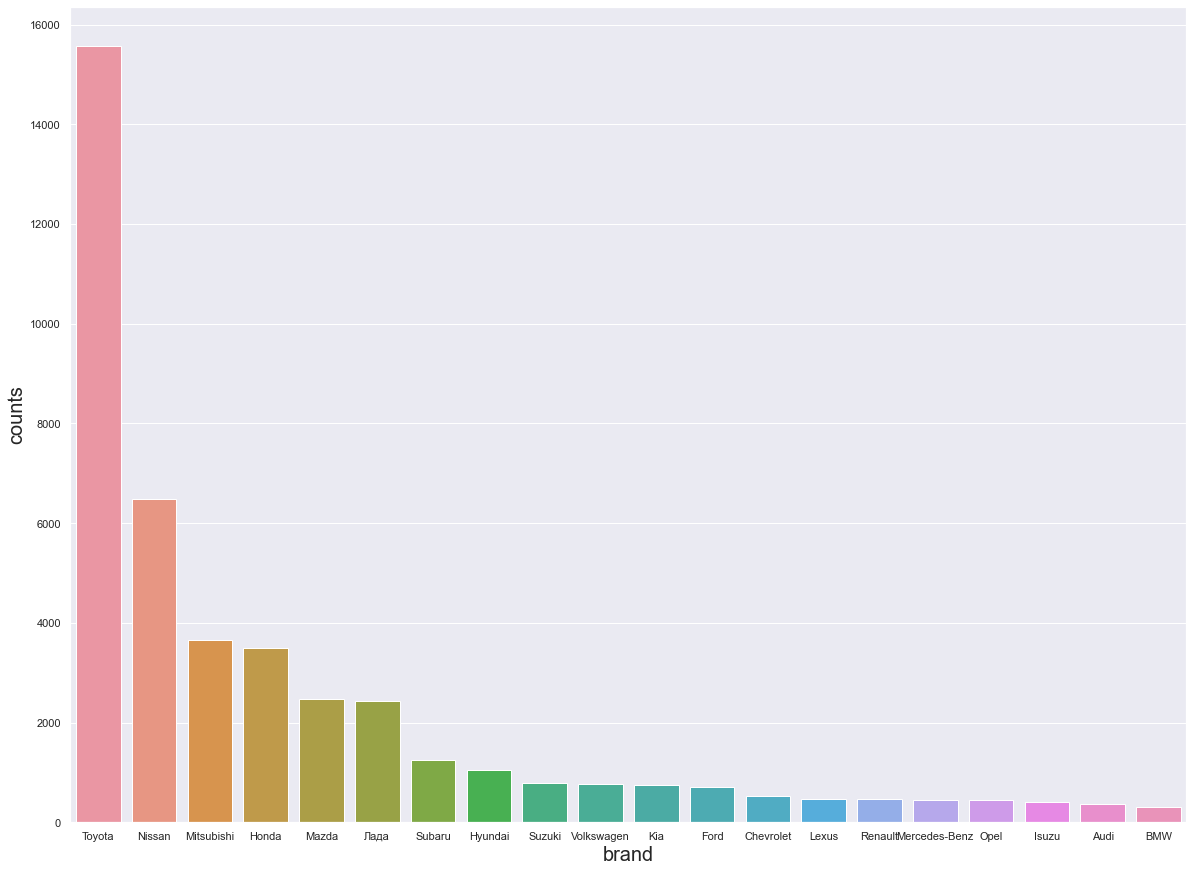

In [10]:
df_brands=df_procesed.groupby("brand").size().reset_index(name='counts')
df_brands=df_brands.sort_values(by="counts",ascending=False)
display(df_brands)

#for top 20 brands by count of pairs
df_brands_top_20=df_brands.head(20)
display(df_brands_top_20)
sns.barplot(x=df_brands_top_20.brand,y=df_brands_top_20.counts)

,model,counts
305,Corolla,1253
247,Camry,1234
1092,X-Trail,1058
551,Ipsum,925
667,Mark II,784
...,...,...
135,Alpheon,1
996,Tiburon,1
997,Tiggo 2,1
281,Chrysler,1


,model,counts
305,Corolla,1253
247,Camry,1234
1092,X-Trail,1058
551,Ipsum,925
667,Mark II,784
231,CR-V,642
607,Land Cruiser Prado,536
441,Forester,491
309,Corolla Fielder,478
753,Pajero,475


<AxesSubplot:xlabel='model', ylabel='counts'>

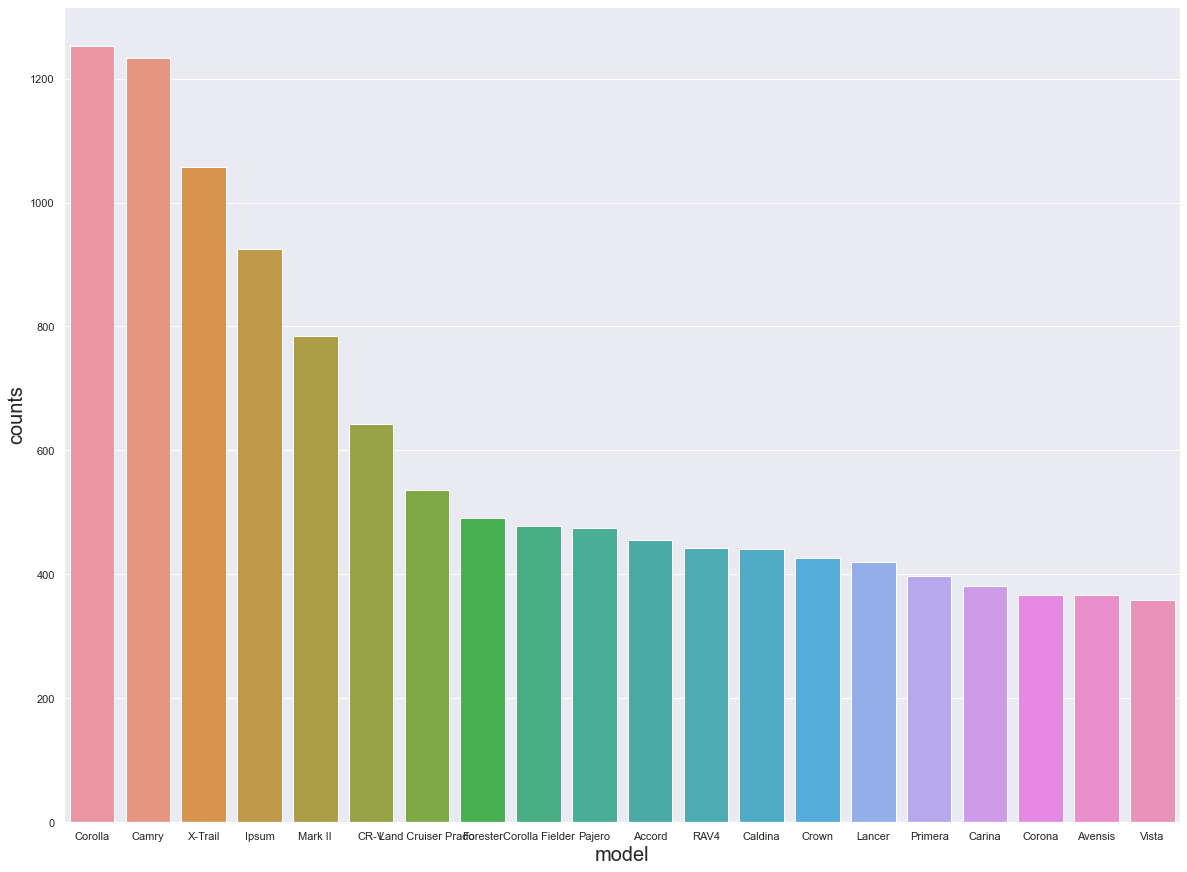

In [11]:
#The same for models
df_models=df_procesed.groupby("model").size().reset_index(name='counts')
df_models=df_models.sort_values(by="counts",ascending=False)
display(df_models)

#for top 20 model by count of pairs
df_models_top_20=df_models.head(20)
display(df_models_top_20)
sns.barplot(x=df_models_top_20.model,y=df_models_top_20.counts)

,year,counts
30,2001,2463
37,2008,2276
29,2000,2229
27,1998,2213
28,1999,2139
31,2002,2012
36,2007,1966
32,2003,1820
26,1997,1709
35,2006,1656


,year,counts
11,1982,7
8,1979,3
6,1977,3
7,1978,2
2,1972,2
1,1971,1
10,1981,1
5,1976,1
4,1975,1
3,1973,1


,year,counts
30,2001,2463
37,2008,2276
29,2000,2229
27,1998,2213
28,1999,2139
31,2002,2012
36,2007,1966
32,2003,1820
26,1997,1709
35,2006,1656


<AxesSubplot:xlabel='year', ylabel='counts'>

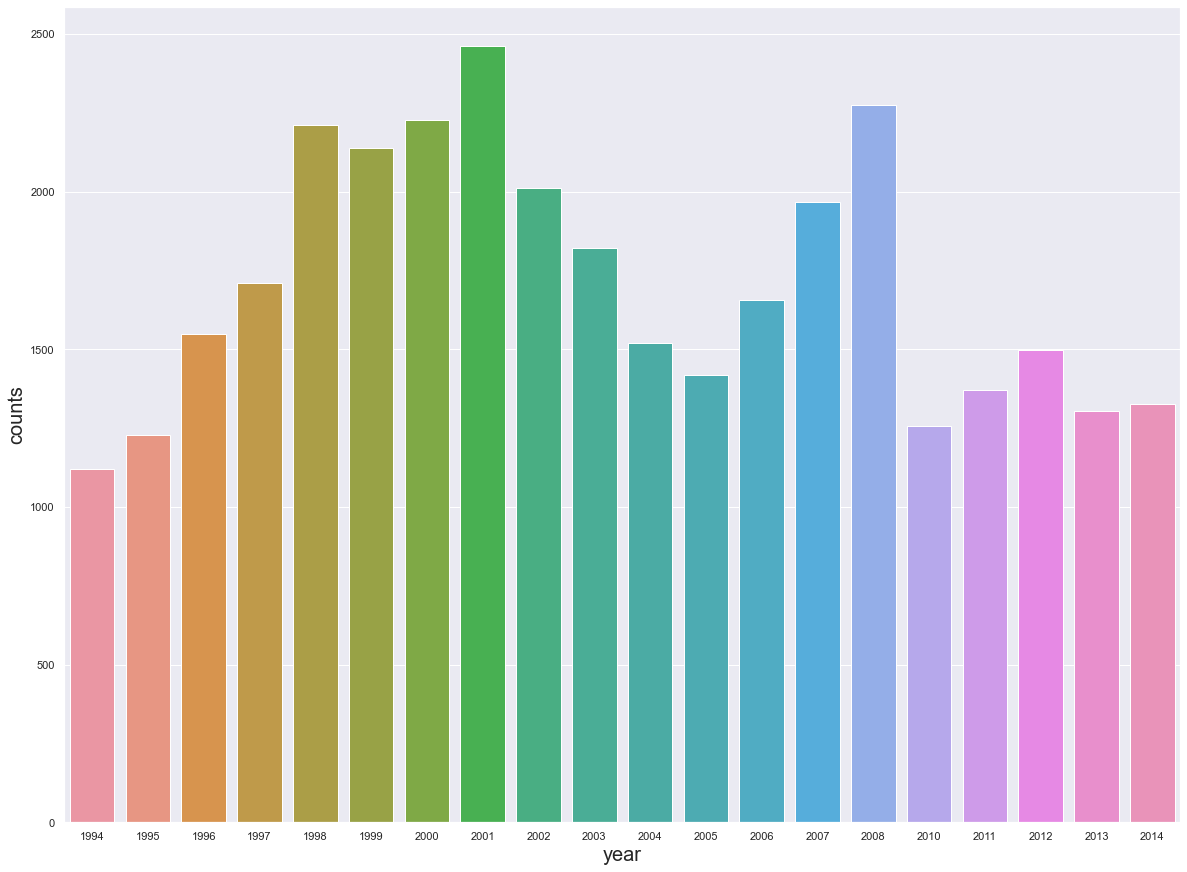

In [12]:
#The same for years
df_years=df_procesed.groupby("year").size().reset_index(name='counts')
df_years=df_years.sort_values(by="counts",ascending=False)
display(df_years.head(10))
display(df_years.tail(10))


#for top 20 year by count of pairs
df_years_top_20=df_years.head(20)
display(df_years_top_20)
sns.barplot(x=df_years_top_20.year,y=df_years_top_20.counts)

In [13]:
df_brand_model=df_procesed.groupby(["brand","model"]).size().reset_index(name='counts')
df_brand_model

,brand,model,counts
0,Acura,CL,1
1,Acura,ILX,1
2,Acura,MDX,12
3,Acura,RDX,1
4,Acura,RSX,1
...,...,...,...
1198,УАЗ,Патриот,117
1199,УАЗ,Пикап,4
1200,УАЗ,Профи,5
1201,УАЗ,УАЗ,10


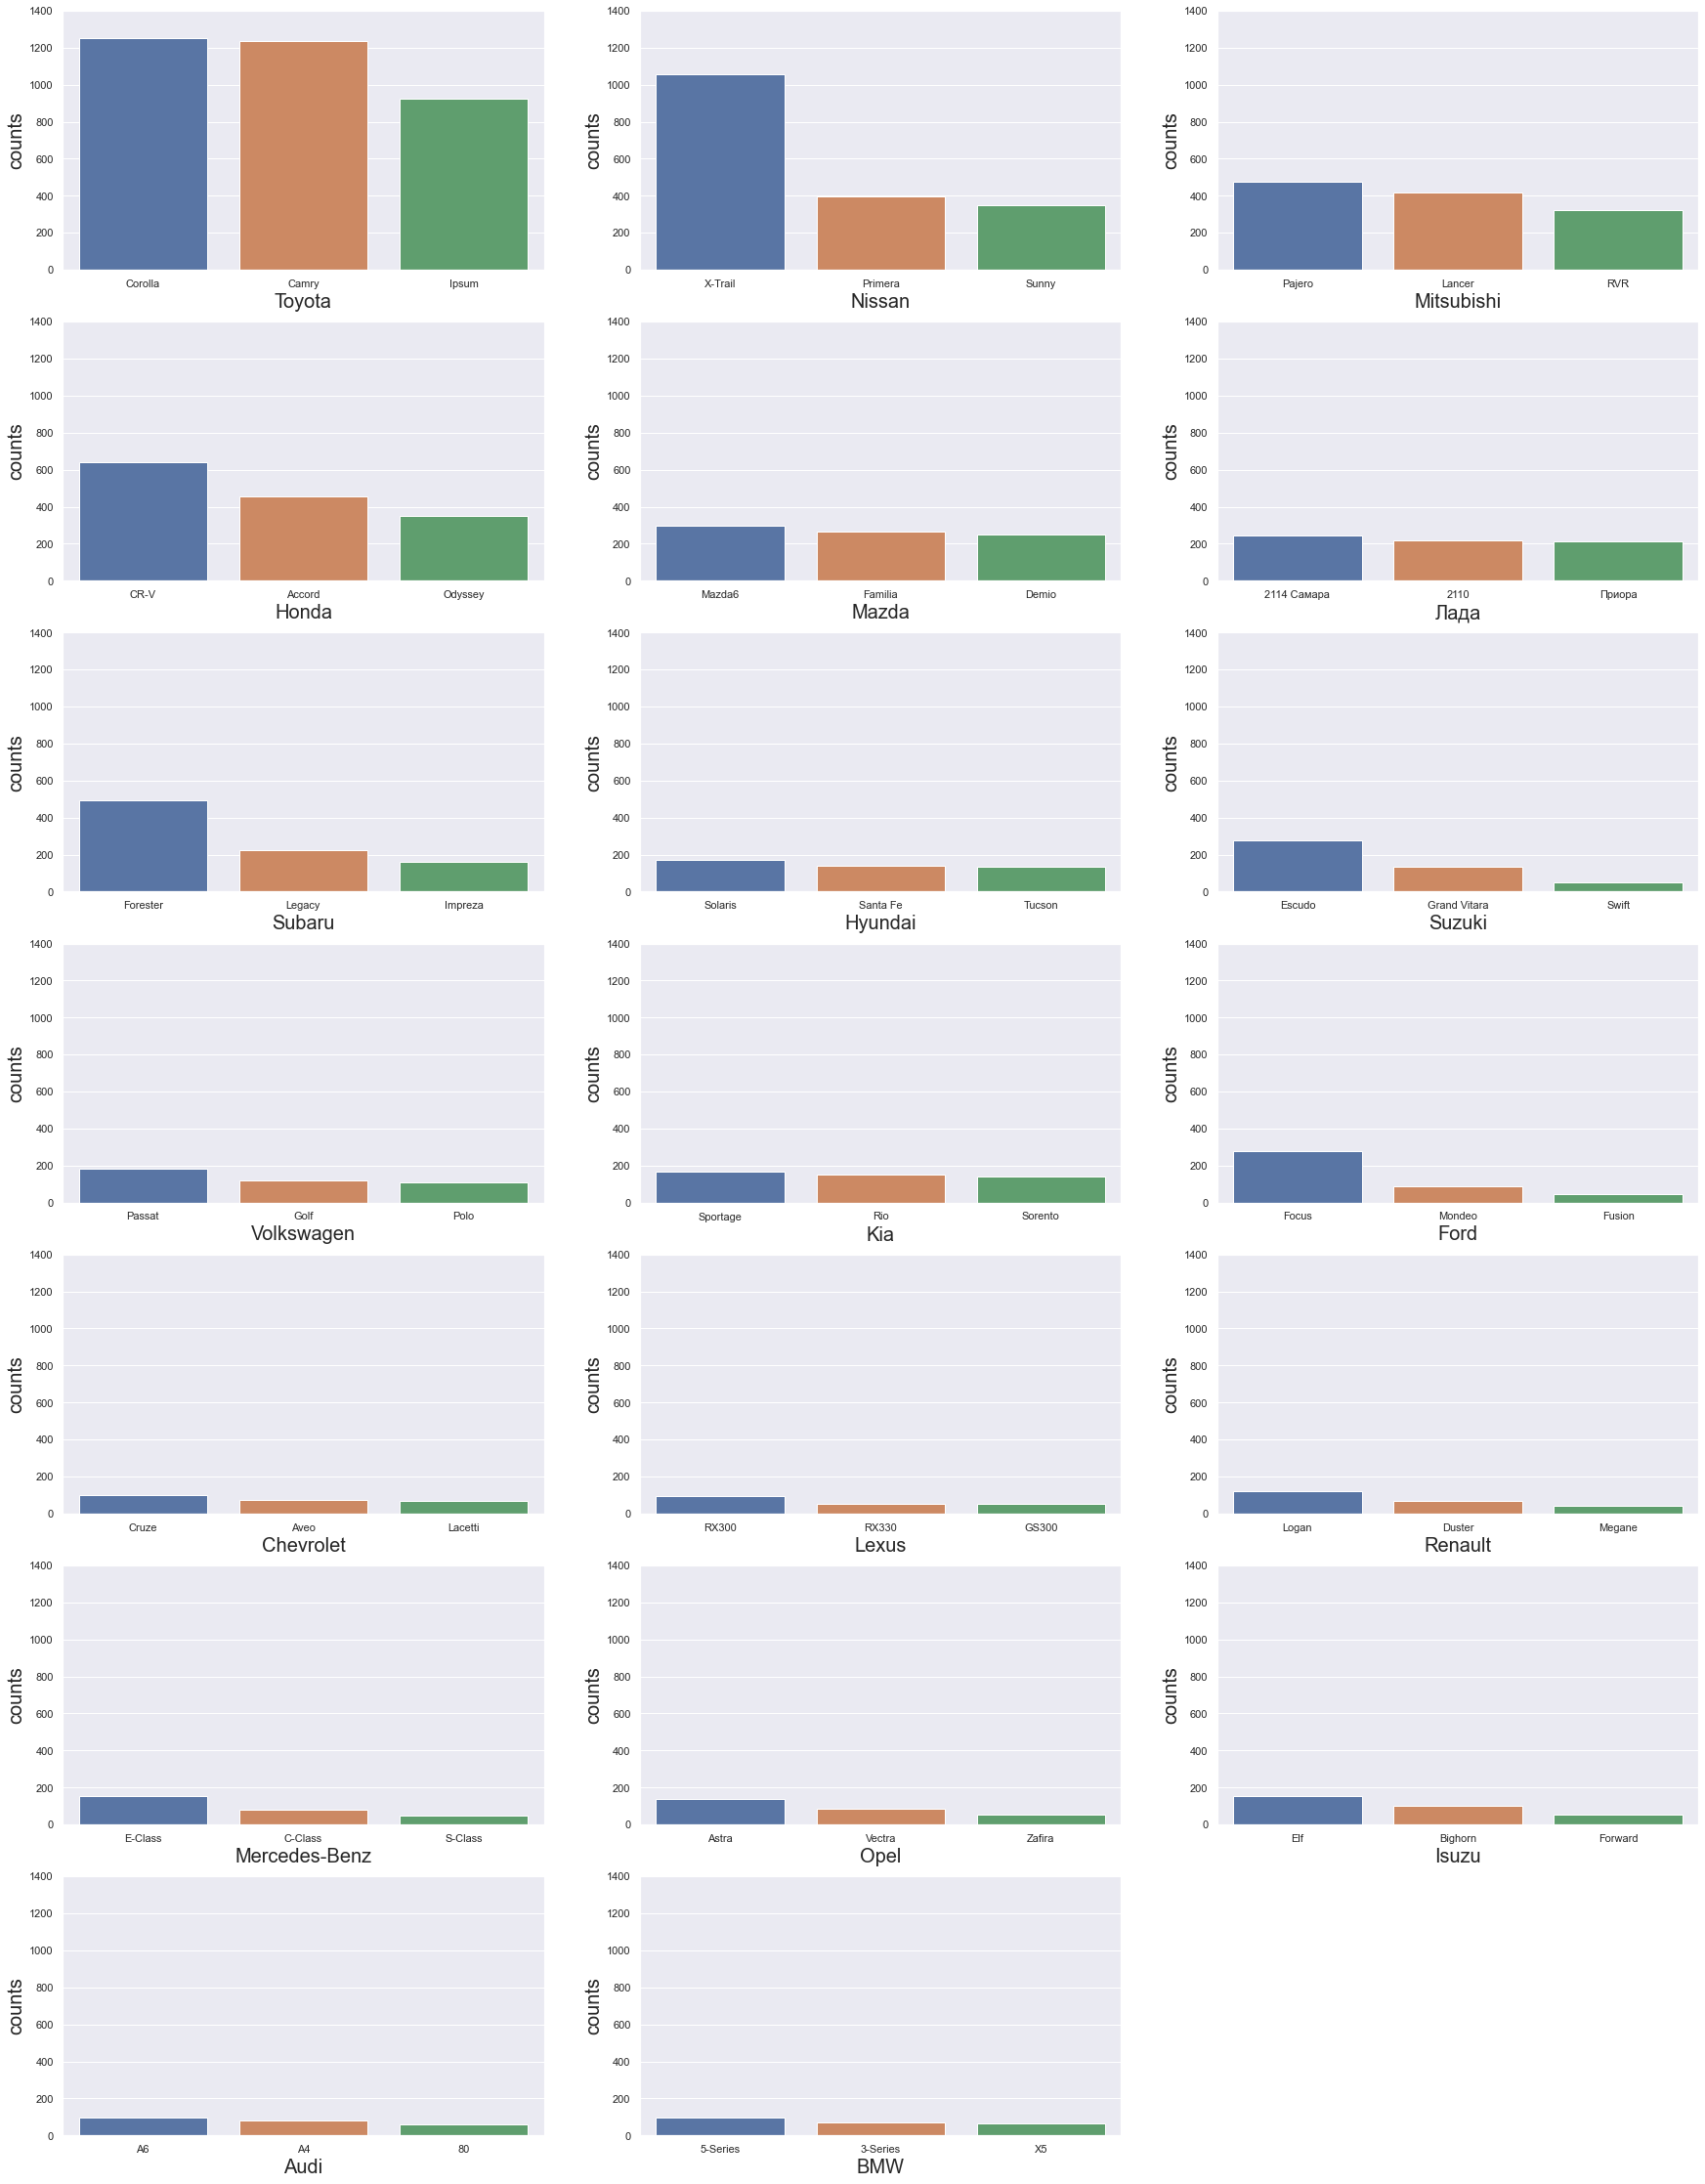

In [14]:
#Top 3 models for every brand from top 20
sns.set(rc={'figure.figsize':(30,40),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

for i in range(0,20):
    plt.subplot(7,3,i+1)

    brand_i=df_brands_top_20.iloc[i,:].brand

    brand_i_models=df_brand_model[df_brand_model.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
    
    ax=sns.barplot(x=brand_i_models.model,y=brand_i_models.counts)
    ax.set_xlabel(brand_i)
    #fix y limit to compare counts
    ax.set_ylim(0,1400)

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})


In [15]:
df_brand_year=df_procesed.groupby(["brand","year"]).size().reset_index(name='counts')
df_brand_year

,brand,year,counts
0,Acura,1994,1
1,Acura,2000,1
2,Acura,2002,2
3,Acura,2003,1
4,Acura,2005,4
...,...,...,...
1280,УАЗ,2016,7
1281,УАЗ,2017,20
1282,УАЗ,2018,9
1283,УАЗ,2019,5


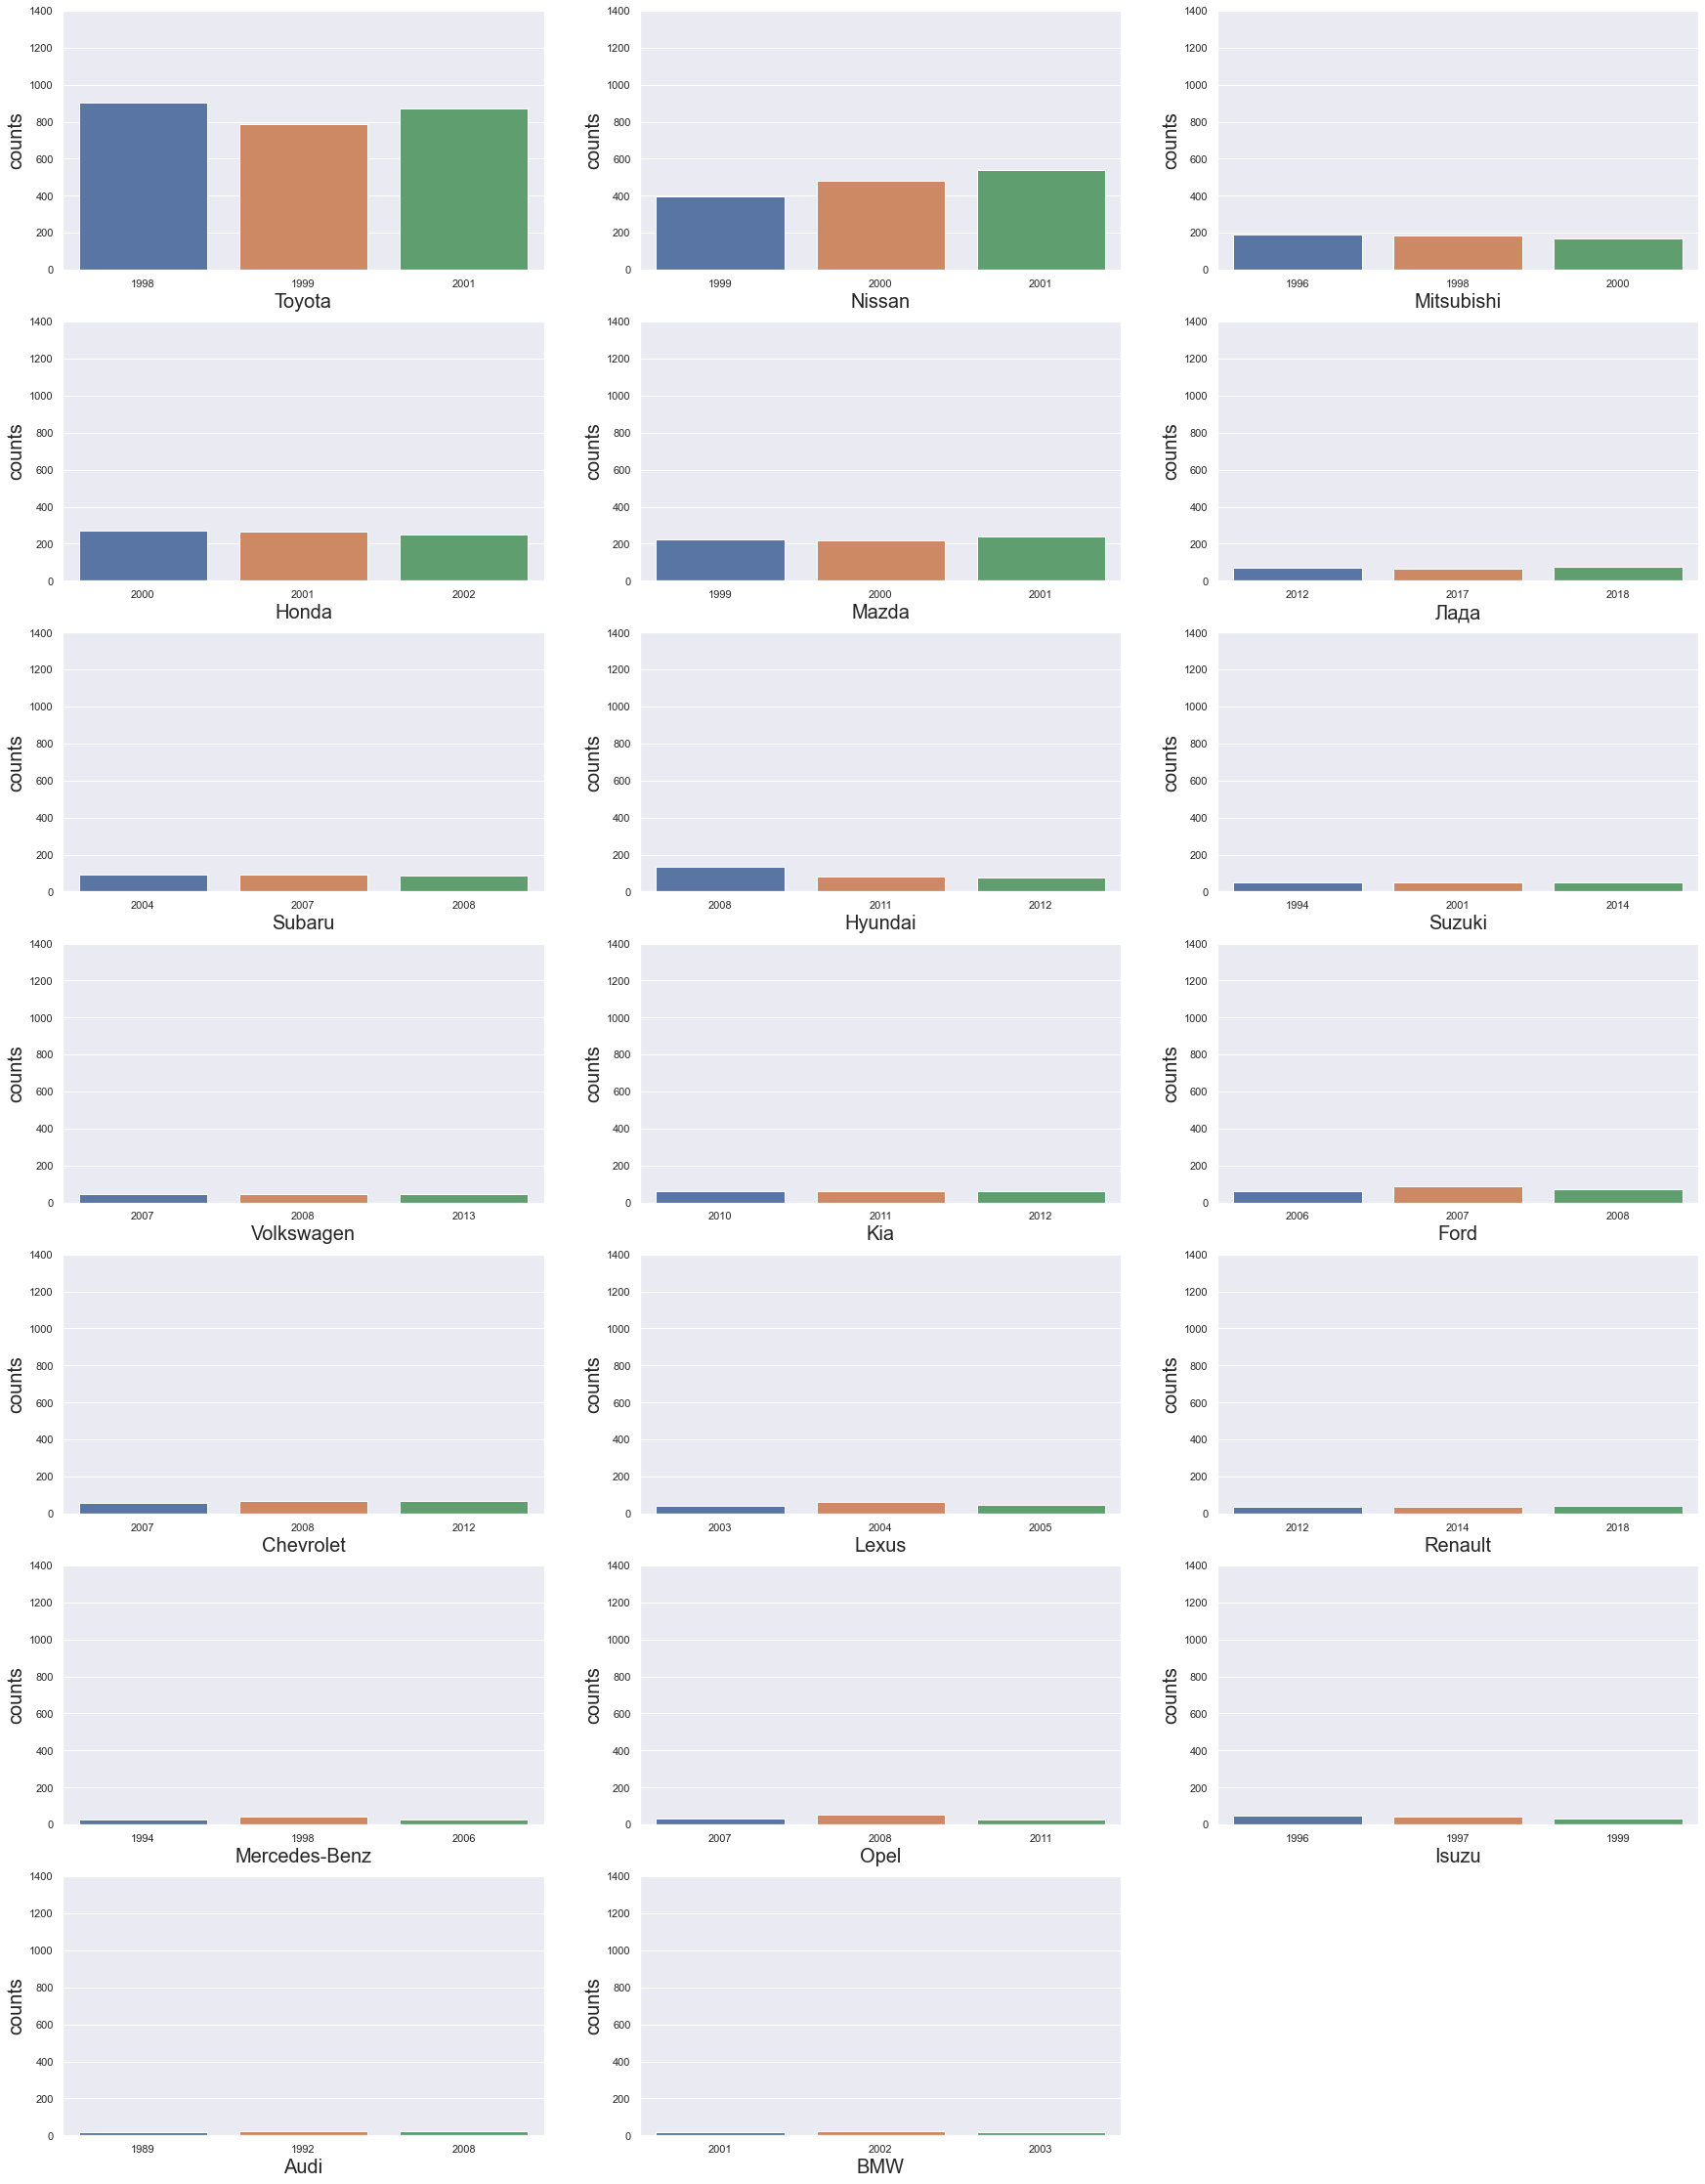

In [16]:
#Top 3 years for every brand from top 20
sns.set(rc={'figure.figsize':(30,40),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

for i in range(0,20):
    plt.subplot(7,3,i+1)

    brand_i=df_brands_top_20.iloc[i,:].brand

    brand_i_years=df_brand_year[df_brand_year.brand==brand_i].sort_values(by="counts",ascending=False).head(3)
    
    ax=sns.barplot(x=brand_i_years.year,y=brand_i_years.counts)
    ax.set_xlabel(brand_i)
    #fix y limit to compare counts
    ax.set_ylim(0,1400)

sns.set(rc={'figure.figsize':(20,15),"font.size":20,"axes.titlesize":20,"axes.labelsize":20})

<h3>We want to get word frequency for lemmatizated words in problem and solution columns

In [18]:
#lemmatization
m = Mystem()

df_procesed["problem"].apply(lambda x:m.lemmatize(x))
df_procesed["solution"].apply(lambda x:m.lemmatize(x))
df_procesed